# Lead Scoring Case Study

![](https://saaslist.com/uploads/lead-scoring-model-1.jpg)

## Problem Statement



An education company named X Education sells online courses to industry professionals. The people who are interested in the courses land on their website and browse for courses. The company markets it's courses on several websites. Once the people check the website either they browse or fill the forms or watch video to know more about the courses.

The problem here is, there are many people/leads who visit the website but only few opts for the courses or pay for it. Here, we need to find out promising leads as paying customers.We need to build a model where we can assign a lead score to each of the leads such that the customers with higher lead score have a higher chance conversion and the customers with lower lead score have a lower chances conversion.

To find out high lead scoring customer we need to go through the activities of leads. How much time do they spend on website? What is their current position? What is their motto for joining the course? etc.

##### Objective:

Our aim is to build the model to find out most promising leads with high chace of conversion. This will help company to focus on the potential leads. 

## 1. Importing the Libraries and Reading the Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing libraries to read data and visualisation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing libraries for model building and evaluation

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
# Reading the data
lead= pd.read_csv('../input/leadscore/Leads.csv')


## 2. Inspecting the Dataframe

In [4]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
lead.shape

(9240, 37)

In [7]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
# Dropping the variables which are not important or required for model building

lead= lead.drop(['Country','Specialization','Prospect ID','Lead Origin','Lead Source','Do Not Email','Do Not Call','Last Activity','How did you hear about X Education','What matters most to you in choosing a course','Search','Magazine', 'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Tags','Update me on Supply Chain Content','Get updates on DM Content','City','Asymmetrique Activity Index','Asymmetrique Profile Index','I agree to pay the amount through cheque','A free copy of Mastering The Interview'],1)
lead.shape

(9240, 11)

## 3. Data Preparation

### For categorical variables with multiple levels, creating the dummy variables

In [9]:
# Creating dummy variables for categorical variables

dummy= pd.get_dummies(lead[['Lead Profile','What is your current occupation','Lead Quality','Last Notable Activity']], drop_first=True)

# Adding dummy variable to data set

lead= pd.concat([lead, dummy], axis=1)

### Dropping the repeated variables

In [10]:
# We have created dummies for the below variables, so we can drop them

lead = lead.drop(['Lead Profile','What is your current occupation','Lead Quality','Last Notable Activity'], 1)

### Checking for Outliers

In [11]:
# Checking for outliers in the continuous variables

num_lead = lead[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score']]

# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%

num_lead.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,3.445238,487.698268,2.362820,14.306252,16.344883
std,4.854853,548.021466,2.161418,1.386694,1.811395
min,0.000000,0.000000,0.000000,7.000000,11.000000
25%,1.000000,12.000000,1.000000,14.000000,15.000000
50%,3.000000,248.000000,2.000000,14.000000,16.000000
75%,5.000000,936.000000,3.000000,15.000000,18.000000
90%,7.000000,1380.000000,5.000000,16.000000,19.000000
95%,10.000000,1562.000000,6.000000,17.000000,20.000000
99%,17.000000,1840.610000,9.000000,17.000000,20.000000


From above table we can say that there are some outliers present in the 'Total Visits' and 'Page Views Per Visit'. There is big difference between the values at 99% & max value. Other than these two variables 'Total Time Spent on website' has very few outliers.

In [12]:
# Removing the outliers from 'Total Visits' and 'Page Vies Per Visit'

lead = lead[~(lead['TotalVisits'] > 17)]
lead = lead[~(lead['Page Views Per Visit'] > 9)]

In [13]:
#Checking percentage of null values present in data

round((lead.isnull().sum()/len(lead))*100,2)

Lead Number                                              0.00
Converted                                                0.00
TotalVisits                                              1.51
Total Time Spent on Website                              0.00
Page Views Per Visit                                     1.51
Asymmetrique Activity Score                             45.78
Asymmetrique Profile Score                              45.78
Lead Profile_Lateral Student                             0.00
Lead Profile_Other Leads                                 0.00
Lead Profile_Potential Lead                              0.00
Lead Profile_Select                                      0.00
Lead Profile_Student of SomeSchool                       0.00
What is your current occupation_Housewife                0.00
What is your current occupation_Other                    0.00
What is your current occupation_Student                  0.00
What is your current occupation_Unemployed               0.00
What is 

In [14]:
# Removing rows with small NAN data

lead = lead[~np.isnan(lead['TotalVisits'])]
lead = lead[~np.isnan(lead['Page Views Per Visit'])]

In [15]:
# Removing columns with more than 40% NaN data

lead= lead.drop(['Asymmetrique Activity Score','Asymmetrique Profile Score'],1)

In [16]:
#Checking percentage of null values present in data

round((lead.isnull().sum()/len(lead))*100,2)

Lead Number                                             0.0
Converted                                               0.0
TotalVisits                                             0.0
Total Time Spent on Website                             0.0
Page Views Per Visit                                    0.0
Lead Profile_Lateral Student                            0.0
Lead Profile_Other Leads                                0.0
Lead Profile_Potential Lead                             0.0
Lead Profile_Select                                     0.0
Lead Profile_Student of SomeSchool                      0.0
What is your current occupation_Housewife               0.0
What is your current occupation_Other                   0.0
What is your current occupation_Student                 0.0
What is your current occupation_Unemployed              0.0
What is your current occupation_Working Professional    0.0
Lead Quality_Low in Relevance                           0.0
Lead Quality_Might be                   

## 4. Test-Train Split

In [17]:
# Putting feature variable to X
X = lead.drop(['Converted','Lead Number'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,What is your current occupation_Housewife,What is your current occupation_Other,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [18]:
# Putting response variable to y
y = lead['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [19]:
# Splitting the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## 5. Feature Scaling

In [20]:
# Using the Standard scaler for scaling the numeric variables
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,What is your current occupation_Housewife,What is your current occupation_Other,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
9196,0.668862,1.848117,1.455819,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4696,-0.030697,-0.037832,0.399961,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3274,0.319082,-0.642138,-0.127967,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2164,-0.380477,-0.154676,-0.127967,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1667,0.319082,1.258415,-0.481679,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Checking the Not_paying customers Rate

Not_paying = (((len(lead['Converted'])- sum(lead['Converted'])))/len(lead['Converted']))*100
Not_paying

62.07974980453479

We have almost 62% Not Paying customers

## 6. Checking the Correlations

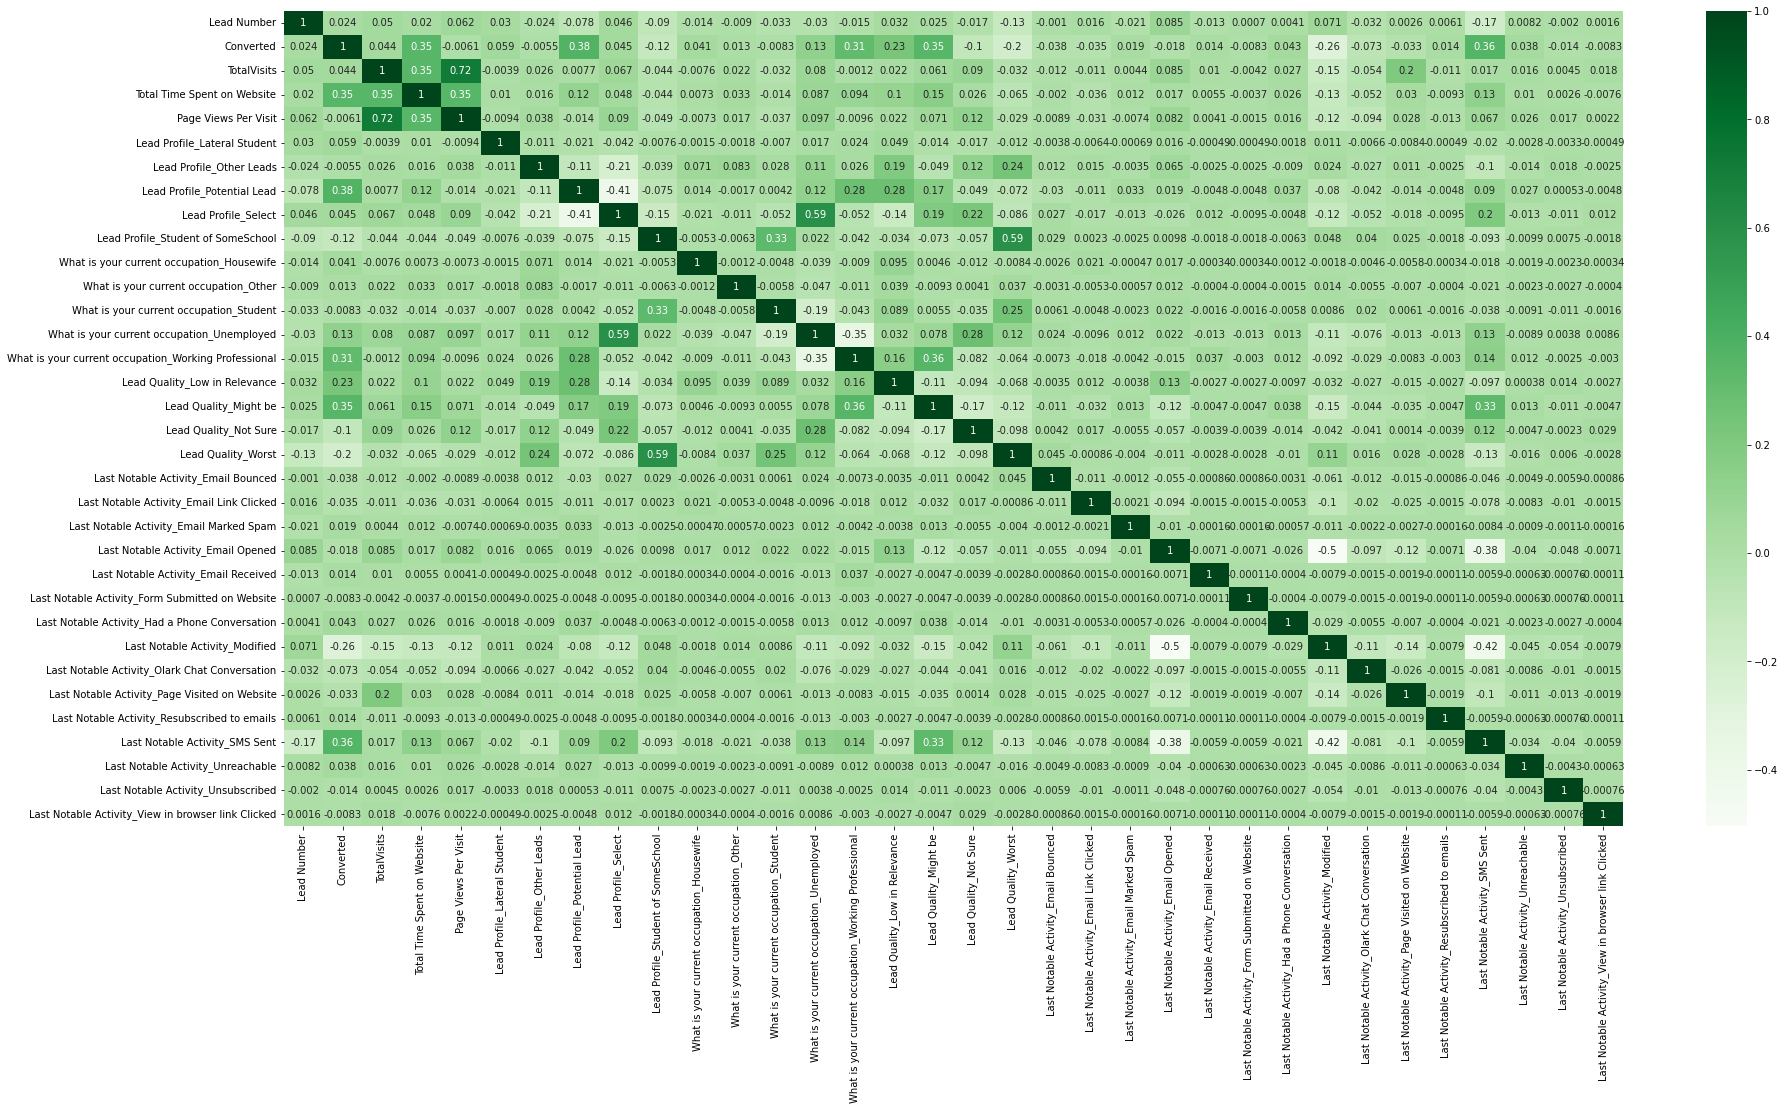

In [22]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,15))        # Size of the figure
sns.heatmap(lead.corr(),annot = True, cmap='Greens')
plt.show()

In [23]:
# Dropping the dummy variables which are highly correlated

X_test = X_test.drop(['Last Notable Activity_Email Opened','Last Notable Activity_Modified','Lead Profile_Select','What is your current occupation_Working Professional'], 1)
X_train = X_train.drop(['Last Notable Activity_Email Opened','Last Notable Activity_Modified','Lead Profile_Select','What is your current occupation_Working Professional'], 1)

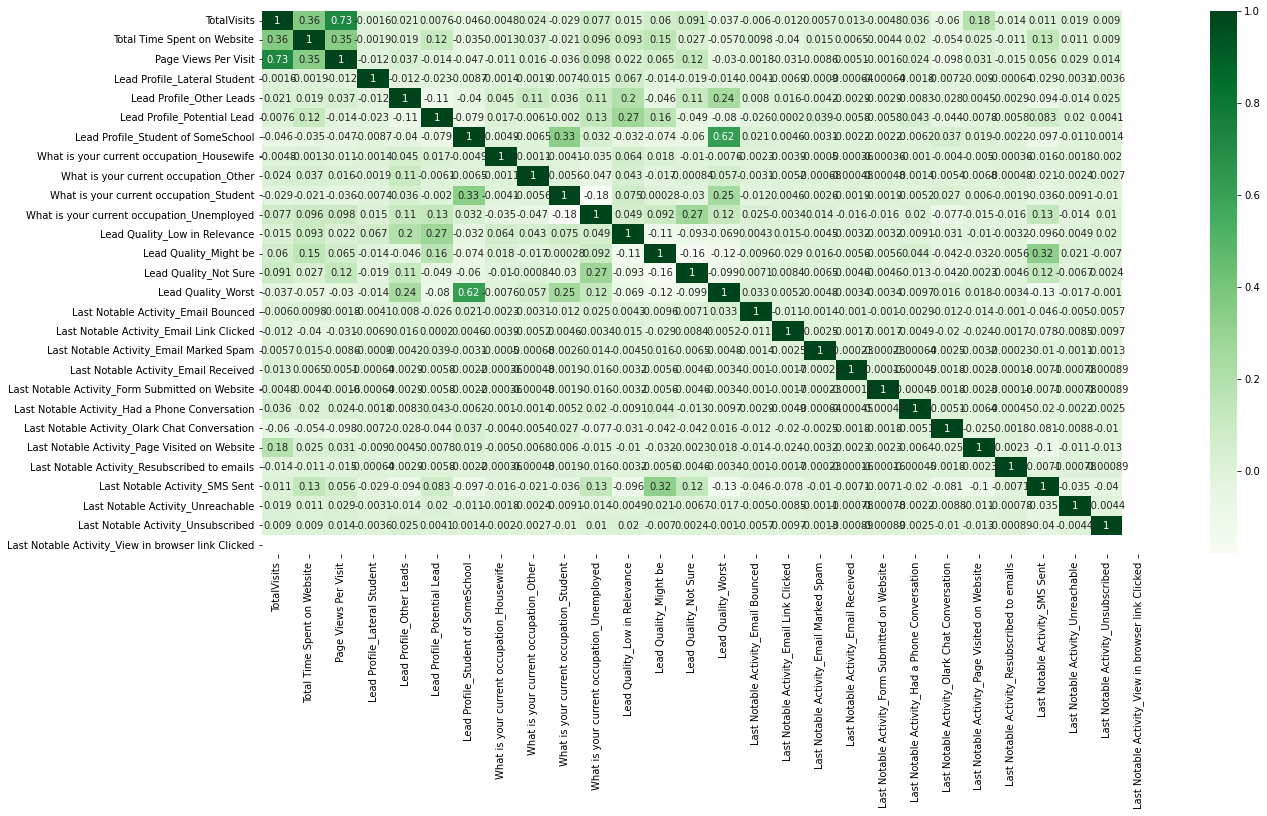

In [24]:
# Creating new correlation matrix after dropping the highly correlated variables

plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True, cmap='Greens')
plt.show()

## 7. Model Building

In [25]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6239
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2531.4
Date:                Sun, 23 Jan 2022   Deviance:                       5062.8
Time:                        18:39:18   Pearson chi2:                 6.71e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                                 -1.8403      0.068    -27.047      0.000      -1.974      -1.707
TotalVisits                                            0.1498      0.052      2.860      0.004       0.047       0.252
Total Time Spent on Website                            0.8813      0.040     22.279      0.000       0.804       0.959
Page Views Per Visit                                  -0.6225      0.055    -11.259      0.000      -0.731      -0.514
Lead Profile_Lateral Student                          24.4890    1.8e+04      0.001      0.999   -3.52e+04    3.52e+04
Lead Profile_Other Leads                               1.0225      0.187      5.476      0.000       0.657       1.388
Lead Profile_Potential Lead                            1.9133      0.102     18.784      0.000       1.714       2.113
Lead Profile_Student of SomeSchool                     0.3945      0.555      0.710      0.477      -0.694       1.483
What is your current occupation_Housewife             23.1478   3.08e+04      0.001      0.999   -6.04e+04    6.04e+04
What is your current occupation_Other                  0.9755      0.958      1.018      0.309      -0.903       2.854
What is your current occupation_Student                0.5626      0.325      1.729      0.084      -0.075       1.200
What is your current occupation_Unemployed             0.5630      0.080      7.035      0.000       0.406       0.720
Lead Quality_Low in Relevance                          1.4020      0.168      8.323      0.000       1.072       1.732
Lead Quality_Might be                                  1.1555      0.101     11.468      0.000       0.958       1.353
Lead Quality_Not Sure                                 -1.1746      0.122     -9.604      0.000      -1.414      -0.935
Lead Quality_Worst                                    -3.3760      0.392     -8.620      0.000      -4.144      -2.608
Last Notable Activity_Email Bounced                   -0.2358      0.473     -0.498      0.618      -1.163       0.691
Last Notable Activity_Email Link Clicked              -0.1135      0.272     -0.418      0.676      -0.646       0.419
Last Notable Activity_Email Marked Spam               21.4278   5.41e+04      0.000      1.000   -1.06e+05    1.06e+05
Last Notable Activity_Email Received                  25.0470   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Last Notable Activity_Form Submitted on Website      -21.4416   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Last Notable Activity_Had a Phone Conversation        23.3622   2.35e+04      0.001      0.999    -4.6e+04     4.6e+04
Last Notable Activity_Olark Chat Conversation         -1.4411      0.378     -3.817      0.000      -2.181  

## 8. Feature Selection Using RFE

In [26]:
logreg = LogisticRegression(solver='liblinear')

rfe = RFE(logreg, 15)           # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [27]:
rfe.support_

array([False,  True, False,  True,  True,  True, False,  True, False,
       False, False,  True,  True,  True,  True, False, False, False,
        True, False,  True,  True, False,  True,  True,  True, False,
       False])

In [28]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 8),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('Lead Profile_Lateral Student', True, 1),
 ('Lead Profile_Other Leads', True, 1),
 ('Lead Profile_Potential Lead', True, 1),
 ('Lead Profile_Student of SomeSchool', False, 13),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', False, 5),
 ('What is your current occupation_Student', False, 4),
 ('What is your current occupation_Unemployed', False, 2),
 ('Lead Quality_Low in Relevance', True, 1),
 ('Lead Quality_Might be', True, 1),
 ('Lead Quality_Not Sure', True, 1),
 ('Lead Quality_Worst', True, 1),
 ('Last Notable Activity_Email Bounced', False, 6),
 ('Last Notable Activity_Email Link Clicked', False, 9),
 ('Last Notable Activity_Email Marked Spam', False, 7),
 ('Last Notable Activity_Email Received', True, 1),
 ('Last Notable Activity_Form Submitted on Website', False, 10),
 ('Last Notable Activity_Had a Phone Conversation', 

In [29]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Profile_Lateral Student',
       'Lead Profile_Other Leads', 'Lead Profile_Potential Lead',
       'What is your current occupation_Housewife',
       'Lead Quality_Low in Relevance', 'Lead Quality_Might be',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [30]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Profile_Student of SomeSchool',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Marked Spam',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object')

### Assessing the model with StatsModels

In [31]:
# Adding constant
X_train_sm = sm.add_constant(X_train[col])

logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2646.8
Date:                Sun, 23 Jan 2022   Deviance:                       5293.5
Time:                        18:39:20   Pearson chi2:                 6.72e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.4952      0.049    -30.251      0.000      -1.592      -1.398
Total Time Spent on Website                        0.7110      0.035     20.463      0.000       0.643       0.779
Lead Profile_Lateral Student                      24.7714   1.72e+04      0.001      0.999   -3.38e+04    3.38e+04
Lead Profile_Other Leads                           1.0813      0.180      6.011      0.000       0.729       1.434
Lead Profile_Potential Lead                        2.0386      0.099     20.570      0.000       1.844       2.233
What is your current occupation_Housewife         22.9280   3.07e+04      0.001      0.999   -6.01e+04    6.01e+04
Lead Quality_Low in Relevance                      1.3765      0.162      8.523      0.000       1.060       1.693
Lead Quality_Might be                              1.1617      0.096     12.040      0.000       0.973       1.351
Lead Quality_Not Sure                             -1.0915      0.116     -9.410      0.000      -1.319      -0.864
Lead Quality_Worst                                -2.9939      0.339     -8.840      0.000      -3.658      -2.330
Last Notable Activity_Email Received              24.6935   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Last Notable Activity_Had a Phone Conversation    22.9460   2.49e+04      0.001      0.999   -4.87e+04    4.88e+04
Last Notable Activity_Olark Chat Conversation     -1.1337      0.364     -3.116      0.002      -1.847      -0.421
Last Notable Activity_Resubscribed to emails      25.6814   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Last Notable Activity_SMS Sent                     1.8636      0.083     22.440      0.000       1.701       2.026
Last Notable Activity_Unreachable                  1.4683      0.518      2.837      0.005       0.454       2.483
==================================================================================================================
"""

In [32]:
# Dropping the column with high P value
col = col.drop('Last Notable Activity_Email Received')

In [33]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2648.2
Date:                Sun, 23 Jan 2022   Deviance:                       5296.4
Time:                        18:39:21   Pearson chi2:                 6.73e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.4934      0.049    -30.235      0.000      -1.590      -1.397
Total Time Spent on Website                        0.7114      0.035     20.475      0.000       0.643       0.779
Lead Profile_Lateral Student                      24.7700   1.72e+04      0.001      0.999   -3.38e+04    3.38e+04
Lead Profile_Other Leads                           1.0806      0.180      6.008      0.000       0.728       1.433
Lead Profile_Potential Lead                        2.0376      0.099     20.562      0.000       1.843       2.232
What is your current occupation_Housewife         22.9279   3.07e+04      0.001      0.999   -6.01e+04    6.01e+04
Lead Quality_Low in Relevance                      1.3754      0.162      8.516      0.000       1.059       1.692
Lead Quality_Might be                              1.1606      0.096     12.029      0.000       0.972       1.350
Lead Quality_Not Sure                             -1.0925      0.116     -9.419      0.000      -1.320      -0.865
Lead Quality_Worst                                -2.9953      0.339     -8.844      0.000      -3.659      -2.332
Last Notable Activity_Had a Phone Conversation    22.9453   2.49e+04      0.001      0.999   -4.87e+04    4.88e+04
Last Notable Activity_Olark Chat Conversation     -1.1351      0.364     -3.120      0.002      -1.848      -0.422
Last Notable Activity_Resubscribed to emails      25.6799   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Last Notable Activity_SMS Sent                     1.8625      0.083     22.429      0.000       1.700       2.025
Last Notable Activity_Unreachable                  1.4670      0.518      2.834      0.005       0.453       2.481
==================================================================================================================
"""

In [34]:
# Dropping 'Last Notable Activity_Resubscribed to emails' varible as it high P value
col = col.drop('Last Notable Activity_Resubscribed to emails')

In [35]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2650.4
Date:                Sun, 23 Jan 2022   Deviance:                       5300.8
Time:                        18:39:22   Pearson chi2:                 6.72e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.4911      0.049    -30.215      0.000      -1.588      -1.394
Total Time Spent on Website                        0.7103      0.035     20.454      0.000       0.642       0.778
Lead Profile_Lateral Student                      24.7675   1.72e+04      0.001      0.999   -3.38e+04    3.38e+04
Lead Profile_Other Leads                           1.0795      0.180      6.002      0.000       0.727       1.432
Lead Profile_Potential Lead                        2.0359      0.099     20.551      0.000       1.842       2.230
What is your current occupation_Housewife         22.9269   3.07e+04      0.001      0.999   -6.01e+04    6.01e+04
Lead Quality_Low in Relevance                      1.3741      0.161      8.510      0.000       1.058       1.691
Lead Quality_Might be                              1.1594      0.096     12.020      0.000       0.970       1.348
Lead Quality_Not Sure                             -1.0930      0.116     -9.426      0.000      -1.320      -0.866
Lead Quality_Worst                                -2.9962      0.339     -8.848      0.000      -3.660      -2.333
Last Notable Activity_Had a Phone Conversation    22.9447   2.49e+04      0.001      0.999   -4.87e+04    4.88e+04
Last Notable Activity_Olark Chat Conversation     -1.1366      0.364     -3.125      0.002      -1.849      -0.424
Last Notable Activity_SMS Sent                     1.8607      0.083     22.416      0.000       1.698       2.023
Last Notable Activity_Unreachable                  1.4653      0.517      2.832      0.005       0.451       2.479
==================================================================================================================
"""

In [36]:
# Dropping the column due to high P value
col = col.drop('Lead Profile_Lateral Student')

In [37]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6254
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2672.8
Date:                Sun, 23 Jan 2022   Deviance:                       5345.6
Time:                        18:39:22   Pearson chi2:                 6.72e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.4691      0.049    -30.016      0.000      -1.565      -1.373
Total Time Spent on Website                        0.7040      0.035     20.358      0.000       0.636       0.772
Lead Profile_Other Leads                           1.0403      0.180      5.789      0.000       0.688       1.392
Lead Profile_Potential Lead                        2.0089      0.099     20.366      0.000       1.816       2.202
What is your current occupation_Housewife         21.8844   1.86e+04      0.001      0.999   -3.65e+04    3.65e+04
Lead Quality_Low in Relevance                      1.4289      0.160      8.926      0.000       1.115       1.743
Lead Quality_Might be                              1.1534      0.096     11.993      0.000       0.965       1.342
Lead Quality_Not Sure                             -1.0930      0.116     -9.456      0.000      -1.319      -0.866
Lead Quality_Worst                                -2.9942      0.338     -8.855      0.000      -3.657      -2.331
Last Notable Activity_Had a Phone Conversation    21.9402   1.51e+04      0.001      0.999   -2.96e+04    2.96e+04
Last Notable Activity_Olark Chat Conversation     -1.1527      0.363     -3.175      0.001      -1.864      -0.441
Last Notable Activity_SMS Sent                     1.8428      0.083     22.275      0.000       1.681       2.005
Last Notable Activity_Unreachable                  1.4482      0.516      2.805      0.005       0.436       2.460
==================================================================================================================
"""

In [38]:
# Dropping the varible as it has high P value of 0.999
col = col.drop('What is your current occupation_Housewife')

# Assessing the model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6255
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2675.0
Date:                Sun, 23 Jan 2022   Deviance:                       5350.1
Time:                        18:39:23   Pearson chi2:                 6.73e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.4686      0.049    -30.014      0.000      -1.564      -1.373
Total Time Spent on Website                        0.7028      0.035     20.331      0.000       0.635       0.771
Lead Profile_Other Leads                           1.0526      0.179      5.891      0.000       0.702       1.403
Lead Profile_Potential Lead                        2.0073      0.099     20.358      0.000       1.814       2.201
Lead Quality_Low in Relevance                      1.4429      0.160      9.038      0.000       1.130       1.756
Lead Quality_Might be                              1.1586      0.096     12.055      0.000       0.970       1.347
Lead Quality_Not Sure                             -1.0936      0.116     -9.465      0.000      -1.320      -0.867
Lead Quality_Worst                                -2.9983      0.338     -8.868      0.000      -3.661      -2.336
Last Notable Activity_Had a Phone Conversation    21.9373   1.51e+04      0.001      0.999   -2.96e+04    2.96e+04
Last Notable Activity_Olark Chat Conversation     -1.1540      0.363     -3.178      0.001      -1.866      -0.442
Last Notable Activity_SMS Sent                     1.8410      0.083     22.257      0.000       1.679       2.003
Last Notable Activity_Unreachable                  1.4466      0.516      2.801      0.005       0.434       2.459
==================================================================================================================
"""

In [39]:
# Dropping the varible as it has high P value of 0.999
col = col.drop('Last Notable Activity_Had a Phone Conversation')

# Assessing the model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6256
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2678.8
Date:                Sun, 23 Jan 2022   Deviance:                       5357.6
Time:                        18:39:23   Pearson chi2:                 6.74e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.4662      0.049    -29.988      0.000      -1.562      -1.370
Total Time Spent on Website                       0.7030      0.035     20.341      0.000       0.635       0.771
Lead Profile_Other Leads                          1.0515      0.179      5.884      0.000       0.701       1.402
Lead Profile_Potential Lead                       2.0144      0.098     20.455      0.000       1.821       2.207
Lead Quality_Low in Relevance                     1.4382      0.160      9.006      0.000       1.125       1.751
Lead Quality_Might be                             1.1686      0.096     12.181      0.000       0.981       1.357
Lead Quality_Not Sure                            -1.0941      0.116     -9.471      0.000      -1.320      -0.868
Lead Quality_Worst                               -3.0010      0.338     -8.877      0.000      -3.664      -2.338
Last Notable Activity_Olark Chat Conversation    -1.1594      0.363     -3.191      0.001      -1.872      -0.447
Last Notable Activity_SMS Sent                    1.8357      0.083     22.199      0.000       1.674       1.998
Last Notable Activity_Unreachable                 1.4408      0.517      2.788      0.005       0.428       2.454
=================================================================================================================
"""

These are the final variables which helps to find who contributes towards lead conversion. As we can see dummy variables like 'Lead Profile_Potential Lead' and 'Last Notable Activity_SMS Sent' and variable 'TotalTime Spent on Website' which helps us to focus on which lead should be targeted. 

In [40]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196    0.930152
4696    0.584897
3274    0.479537
2164    0.171515
1667    0.807349
7024    0.111125
8018    0.037735
778     0.127415
6942    0.111125
4440    0.154541
dtype: float64

In [41]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.93015204, 0.58489657, 0.4795368 , 0.17151509, 0.80734852,
       0.11112468, 0.0377354 , 0.12741478, 0.11112468, 0.15454138])

### Creating a dataframe with the actual converted flag and the predicted probabilities

In [42]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,1,0.930152,9196
1,0,0.584897,4696
2,0,0.479537,3274
3,0,0.171515,2164
4,1,0.807349,1667


#### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

Taking 0.5 as cut off value as it is ideal value.

In [43]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Checking final predicted values
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,1,0.930152,9196,1
1,0,0.584897,4696,1
2,0,0.479537,3274,0
3,0,0.171515,2164,0
4,1,0.807349,1667,1


### Confusion Matrix

In [44]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3449  433]
 [ 825 1560]]


Predicted     not_Converted    Converted
Actual
not_Converted        3449      433
Converted            825       1560  

In [45]:
# Checking the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7992659964895484


### Checking VIFs

In [46]:
# Checking for the VIF values of the feature variables. 
# Also creating a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Last Notable Activity_SMS Sent,1.43
4,Lead Quality_Might be,1.41
2,Lead Profile_Potential Lead,1.34
3,Lead Quality_Low in Relevance,1.27
1,Lead Profile_Other Leads,1.25
5,Lead Quality_Not Sure,1.17
6,Lead Quality_Worst,1.11
0,Total Time Spent on Website,1.04
7,Last Notable Activity_Olark Chat Conversation,1.01
9,Last Notable Activity_Unreachable,1.00


Above table shows all the variables have low VIFs

## Calculating Sensitivity, Specificity, FPR & Precision

In [47]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [48]:
# Sensitivity 
TP / float(TP+FN)

0.6540880503144654

In [49]:
# Specificity
TN / float(TN+FP)

0.8884595569294178

With cutoff of 0.5 i.e ideal cutoff we get the sensitivity of 65.4% which not so good for model as Sensitivity should be high for good model. But Specificity is high for the same.

In [50]:
# False Postive Rate (FPR)
print(FP/ float(TN+FP))

0.11154044307058217


In [51]:
# Precision (Positive Predictive Value)
print (TP / float(TP+FP))

0.7827395885599598


In [52]:
# Negative Predictive Value
print (TN / float(TN+ FN))

0.8069723912026205


## 9. Plotting the ROC Curve

In [53]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [54]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

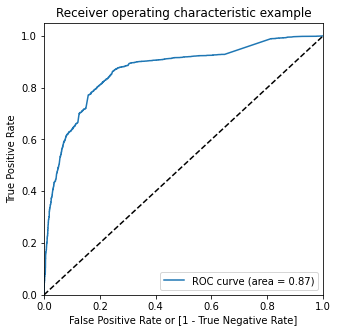

In [55]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

ROC curve which shows the performance of the classification model. For our model ROC curve(AUC) is 0.87 which is closer to 1 which means our model is working satisfactorily.

## 10. Finding Optimal Cutoff Point

- We will be using Sensitivity - Specificity metrics for finding the optimal cutoff for model.
- Optimal cutoff probability is that prob where we get balanced sensitivity and specificity.


In [56]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.930152,9196,1,1,1,1,1,1,1,1,1,1,1
1,0,0.584897,4696,1,1,1,1,1,1,1,0,0,0,0
2,0,0.479537,3274,0,1,1,1,1,1,0,0,0,0,0
3,0,0.171515,2164,0,1,1,0,0,0,0,0,0,0,0
4,1,0.807349,1667,1,1,1,1,1,1,1,1,1,1,0


In [57]:
# Calculating the accuracy, sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# Importing library for confusion matrix
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.493378  0.988679  0.189078
0.2   0.2  0.768310  0.895178  0.690366
0.3   0.3  0.795756  0.844444  0.765842
0.4   0.4  0.809319  0.787002  0.823029
0.5   0.5  0.799266  0.654088  0.888460
0.6   0.6  0.803096  0.608805  0.922463
0.7   0.7  0.787937  0.541300  0.939464
0.8   0.8  0.748524  0.386164  0.971149
0.9   0.9  0.703367  0.242348  0.986605


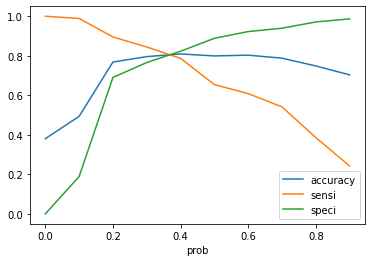

In [58]:
# Plotting accuracy, sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

In [59]:
# Taking 0.4 as cut-off probability for final prediction

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.4 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.930152,9196,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.584897,4696,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.479537,3274,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.171515,2164,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.807349,1667,1,1,1,1,1,1,1,1,1,1,0,1


In [60]:
# Checking the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8093186532631244

In [61]:
# Looking for confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3195,  687],
       [ 508, 1877]])

In [62]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [63]:
# Sensitivity
TP / float(TP+FN)

0.7870020964360587

In [64]:
# Specificity
TN / float(TN+FP)

0.8230293663060279

The Sensitivity is 78.7% that means number of actual positive values are correctly predicted and we got Specificity of 82.3%. The values should be high for both Sensitivity & Specificity for a good model.  

In [65]:
# False Postive Rate(FPR)
print(FP/ float(TN+FP))

0.17697063369397217


In [66]:
# Precision (Positive Predictive Value) 
print (TP / float(TP+FP))

0.7320592823712948


As Precision is a probability that a predicted positive(yes) is actually positive(yes). We have precision of 73% so, we can say that there are 73% of chance for lead conversion.

In [67]:
# Negative Predictive Value
print (TN / float(TN+ FN))

0.862813934647583


## 11. Making predictions on the test set

In [68]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [69]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
7681,-0.304384,0,0,0,0,0,0,0,1,0
984,-0.538073,0,0,0,0,0,1,0,0,0
8135,0.794688,0,0,0,0,0,0,0,1,0
6915,-0.614753,0,0,0,0,0,0,0,0,0
2712,-0.412100,0,1,0,1,0,0,0,0,0


In [70]:
# Adding constant
X_test_sm = sm.add_constant(X_test)

#### Making predictions on the test set

In [71]:
y_test_pred = res.predict(X_test_sm)

In [72]:
y_test_pred[:10]

7681    0.538804
984     0.007803
8135    0.716697
6915    0.130296
2712    0.806465
244     0.082334
4698    0.117357
8287    0.111125
6791    0.605085
8970    0.586229
dtype: float64

In [73]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [74]:
# Let's see the head
y_pred_1.head()

,0
7681,0.538804
984,0.007803
8135,0.716697
6915,0.130296
2712,0.806465


In [75]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [76]:
# Putting 'Lead Number' to index
y_test_df['Lead Number'] = y_test_df.index

In [77]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [78]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [79]:
y_pred_final.head()

,Converted,Lead Number,0
0,0,7681,0.538804
1,0,984,0.007803
2,0,8135,0.716697
3,0,6915,0.130296
4,1,2712,0.806465


In [80]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [81]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Lead Number','Converted','Converted_Prob'])

In [82]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead Number,Converted,Converted_Prob
0,7681,0,0.538804
1,984,0,0.007803
2,8135,0,0.716697
3,6915,0,0.130296
4,2712,1,0.806465


In [83]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.4 else 0)

In [84]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.808265078183172

In [85]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1384,  292],
       [ 223,  787]])

In [86]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [87]:
# Sensitivity 
TP / float(TP+FN)

0.7792079207920792

In [88]:
# Specificity
TN / float(TN+FP)

0.8257756563245824

In [89]:
# False Postive Rate(FPR)
print(FP/ float(TN+FP))

0.17422434367541767


In [90]:
# Precision (Positive Predictive Value) 
print (TP / float(TP+FP))

0.7293790546802595


Precision for test set is same as of train set i.e 73%

In [91]:
# Negative Predictive Value
print (TN / float(TN+ FN))

0.8612321095208463


With a Roc curve of 0.87, We got 78% of Sensitivity & 82.5% of Specificity for the Test set which is almost the same as to train set. So we can say that model built is a good model and works satisfactorily.